In [ ]:
import pandas as pd 

df = pd.read_csv(r'ai_policy\data\Journal.csv')

In [4]:
df.head(1)

,Journal name,URL,JCR Abbreviation,Publisher,ISSN,eISSN,Category,Edition,Total Citations,2023 JIF,JIF Quartile,2023 JCI,% of Citable OA
0,3D Printing in Medicine,https://threedmedprint.biomedcentral.com/,3D PRINT MED,SPRINGERNATURE,NaN,2365-6271,"RADIOLOGY, NUCLEAR MEDICINE & MEDICAL IMAGING",ESCI,697,3.2,Q1,0.97,100%


In [ ]:
def extract_all_categories(df, category_column='Category'):
    all_categories = []
    for index, row in df.iterrows():
        categories = row[category_column]
        if pd.isna(categories) or categories == '':
            continue
            
        category_list = [cat.strip() for cat in str(categories).split(',')]
        all_categories.extend(category_list)
    
    unique_categories = list(set(all_categories))
    category_counts = pd.Series(all_categories).value_counts()
    
    return unique_categories, category_counts

unique_cats, cat_counts = extract_all_categories(df)

# Display results
print(f"Found {len(unique_cats)} different subject categories:")
print("\nAll unique categories:")
for i, cat in enumerate(sorted(unique_cats), 1):
    print(f"{i:2d}. {cat}")

总共发现 229 个不同的学科类别:

所有唯一类别:
 1. ACOUSTICS
 2. AEROSPACE
 3. AGRICULTURAL ECONOMICS & POLICY
 4. AGRICULTURAL ENGINEERING
 5. AGRICULTURE
 6. AGRONOMY
 7. ALLERGY
 8. ANALYTICAL
 9. ANATOMY & MORPHOLOGY
10. ANDROLOGY
11. ANESTHESIOLOGY
12. ANTHROPOLOGY
13. APPLIED
14. AREA STUDIES
15. ARTIFICIAL INTELLIGENCE
16. ASTRONOMY & ASTROPHYSICS
17. ATOMIC
18. AUDIOLOGY & SPEECH-LANGUAGE PATHOLOGY
19. AUTOMATION & CONTROL SYSTEMS
20. BEHAVIORAL SCIENCES
21. BIOCHEMICAL RESEARCH METHODS
22. BIOCHEMISTRY & MOLECULAR BIOLOGY
23. BIODIVERSITY CONSERVATION
24. BIOLOGICAL
25. BIOLOGY
26. BIOMATERIALS
27. BIOMEDICAL
28. BIOPHYSICS
29. BIOTECHNOLOGY & APPLIED MICROBIOLOGY
30. BUSINESS
31. CARDIAC & CARDIOVASCULAR SYSTEMS
32. CELL & TISSUE ENGINEERING
33. CELL BIOLOGY
34. CERAMICS
35. CHARACTERIZATION & TESTING
36. CHEMICAL
37. CHEMISTRY
38. CIVIL
39. CLINICAL
40. CLINICAL NEUROLOGY
41. COATINGS & FILMS
42. COMMUNICATION
43. COMPOSITES
44. COMPUTER SCIENCE
45. CONDENSED MATTER
46. CONSTRUCTION & BUILDING

Domain policy statistics:
policy_status      Has Policy  No Policy
domain                                  
Health Sciences           827        395
Life Sciences             606        202
Multiple                   18         17
Physical Sciences        1065        384
Social Sciences          1070        530


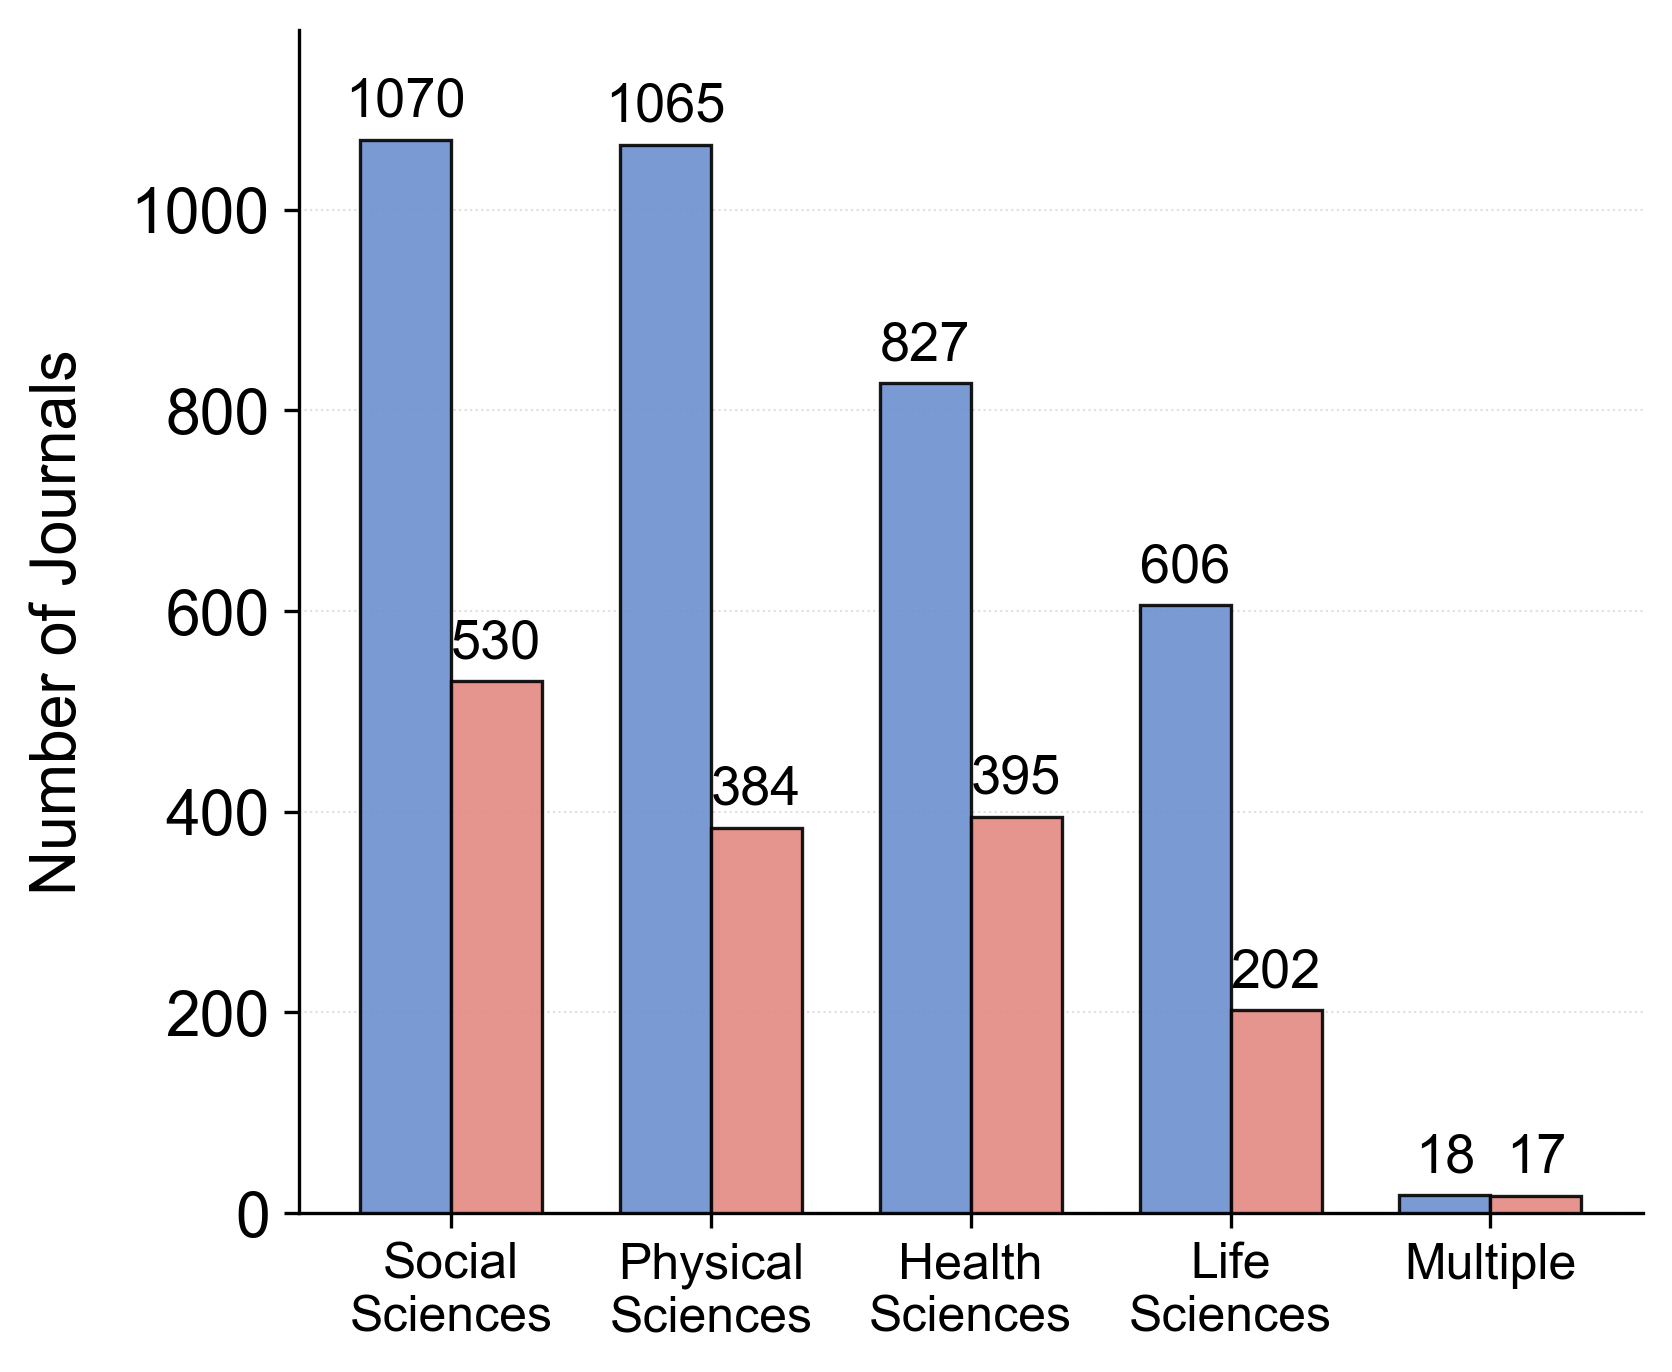

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def apply_unified_style():
    plt.style.use('default')
    plt.rcParams.update({
        'font.family': 'Arial',
        'font.size': 15,
        'axes.labelsize': 15,
        'axes.titlesize': 15,
        'xtick.labelsize': 12,
        'ytick.labelsize': 15,
        'legend.fontsize': 15,
        'figure.dpi': 300,
        'savefig.dpi': 600,
        'axes.linewidth': 0.8,
        'lines.linewidth': 2.0,
        'figure.figsize': (6, 5) 
    })

def set_unified_axes(ax, x_labels):
    ax.set_xticks(np.arange(len(x_labels)))
    wrapped_labels = [label.replace(' ', '\n') for label in x_labels]
    ax.set_xticklabels(wrapped_labels, ha='center')
    ax.set_ylabel('Number of Journals', labelpad=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.4, axis='y')
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(0, ymax * 1.05)
    plt.tight_layout(pad=1.5)

def save_transparent_figure(filename):
    plt.savefig(f'{filename}.png', dpi=600, transparent=True, bbox_inches='tight')
    plt.savefig(f'{filename}.tiff', dpi=600, format='tiff', transparent=True, bbox_inches='tight')

df = pd.read_csv(r'ai_policy\results\policy_res\domain_stats.csv')

df['policy_status'] = df['policy_category'].apply(lambda x: 'No Policy' if x == 'Not Mentioned' else 'Has Policy')

domain_policy_stats = df.groupby(['domain', 'policy_status'])['journal_count'].sum().reset_index()

pivot_data = domain_policy_stats.pivot(index='domain', columns='policy_status', values='journal_count').fillna(0)

print("Domain policy statistics:")
print(pivot_data)

pivot_data['total'] = pivot_data.sum(axis=1)
pivot_data = pivot_data.sort_values('total', ascending=False)
pivot_data = pivot_data.drop('total', axis=1)

domains = pivot_data.index.tolist()
has_policy = pivot_data['Has Policy'].tolist()
no_policy = pivot_data['No Policy'].tolist()



bar_colors = ['#6c8fd0', '#e48a82'] 

apply_unified_style()
fig, ax = plt.subplots()

bar_width = 0.35
x = np.arange(len(domains))

bars1 = ax.bar(x - bar_width/2, has_policy, bar_width, 
               color=bar_colors[0], label='Has Policy', edgecolor='black', linewidth=0.8, alpha=0.9, zorder=3)
bars2 = ax.bar(x + bar_width/2, no_policy, bar_width, 
               color=bar_colors[1], label='No Policy', edgecolor='black', linewidth=0.8, alpha=0.9, zorder=3)

for bar in bars1:
    height = bar.get_height()
    if height > 0:  
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=13)

for bar in bars2:
    height = bar.get_height()
    if height > 0:  
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=13)

set_unified_axes(ax, domains)

# ax.legend(frameon=False, loc='best', ncol=1, handletextpad=0.5, columnspacing=1.0, handlelength=1.5)

save_transparent_figure('domain_policy_distribution——')
plt.show()

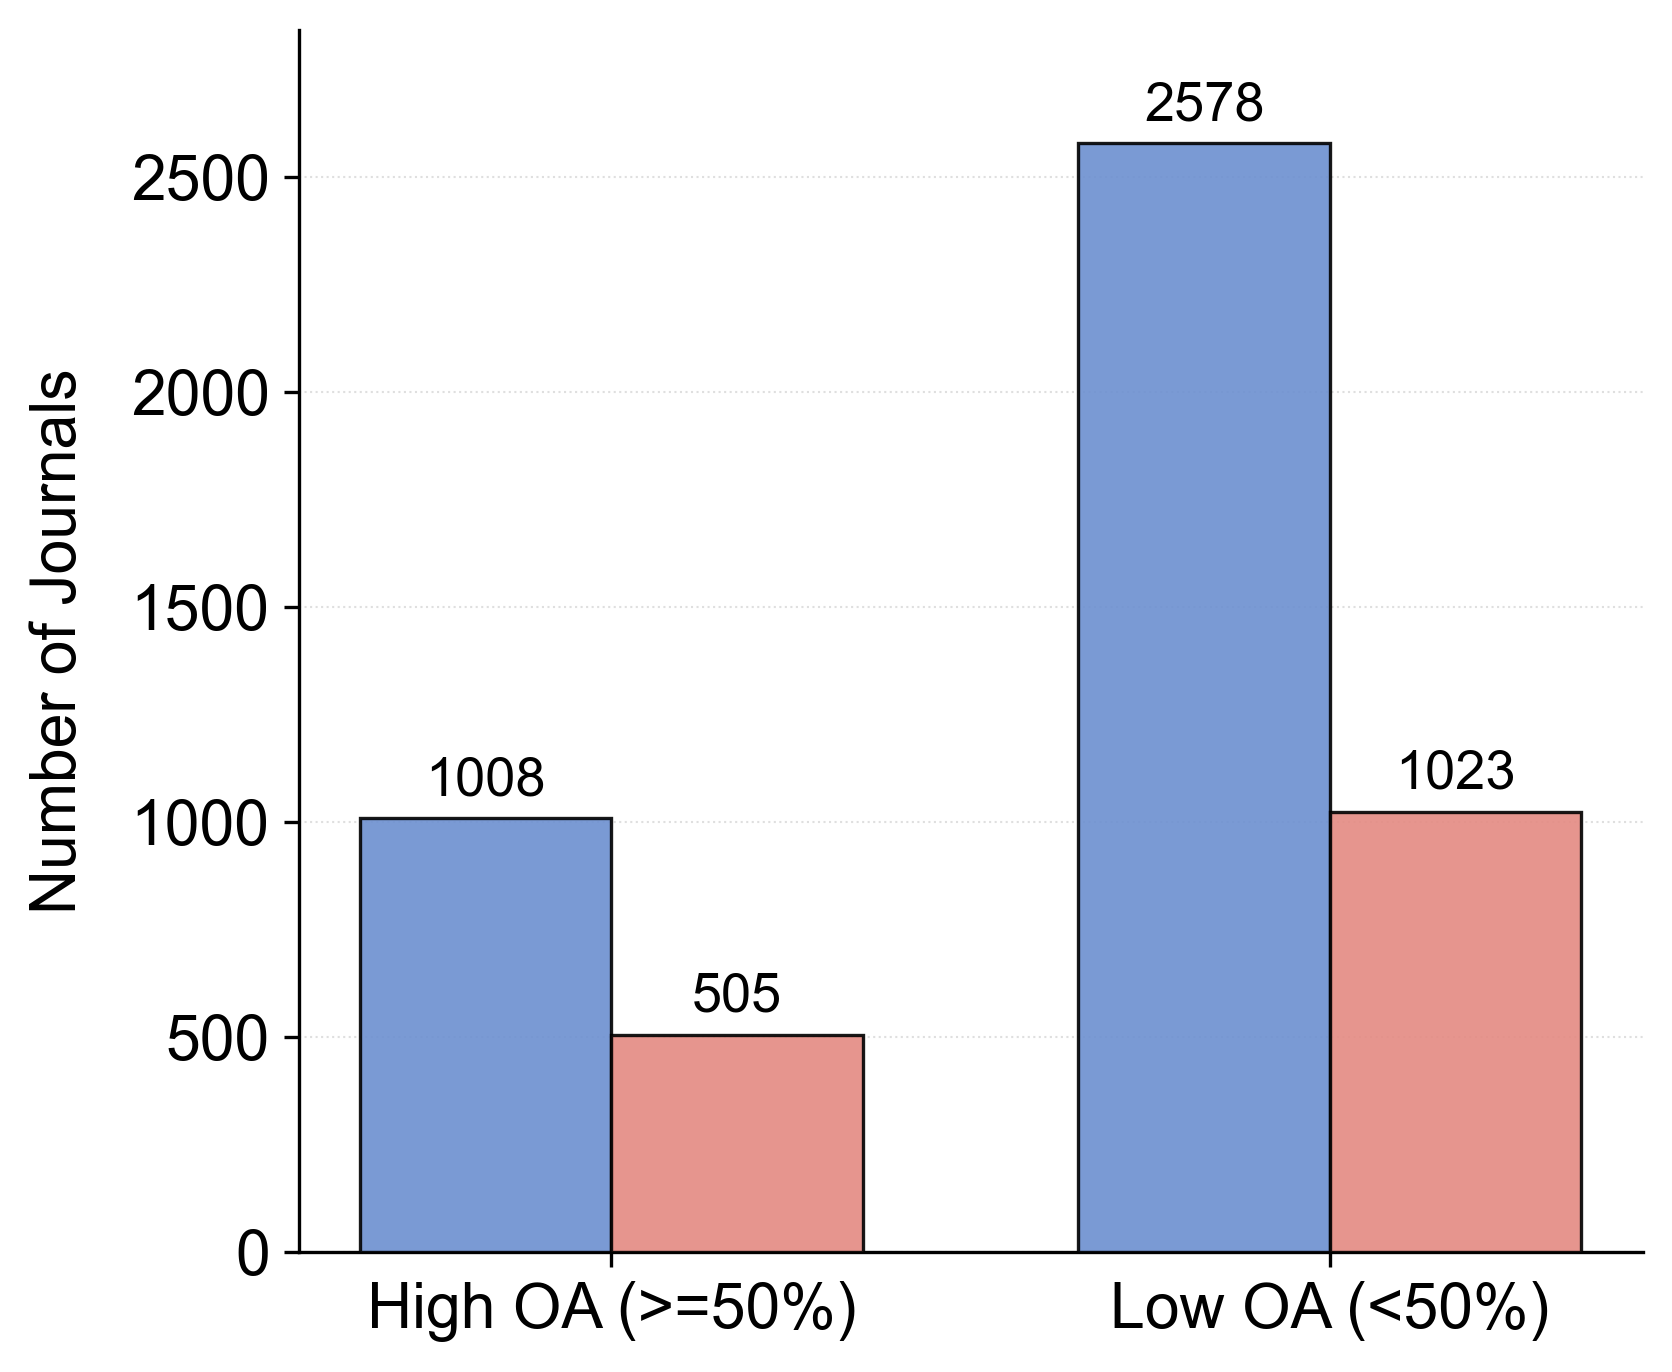

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def apply_unified_style():
    plt.style.use('default')
    plt.rcParams.update({
        'font.family': 'Arial',
        'font.size': 15,
        'axes.labelsize': 15,
        'axes.titlesize': 15,
        'xtick.labelsize': 15,
        'ytick.labelsize': 15,
        'legend.fontsize': 15,
        'figure.dpi': 300,
        'savefig.dpi': 600,
        'axes.linewidth': 0.8,
        'lines.linewidth': 2.0,
        'figure.figsize': (6, 5)  
    })

def set_unified_axes(ax, x_labels):
    ax.set_xticks(np.arange(len(x_labels)))
    ax.set_xticklabels(x_labels)  
    
    ax.set_ylabel('Number of Journals', labelpad=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.4, axis='y')
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(0, ymax * 1.05)
    plt.tight_layout(pad=1.5)

def save_transparent_figure(filename):
    plt.savefig(f'{filename}.png', dpi=600, transparent=True, bbox_inches='tight')
    plt.savefig(f'{filename}.tiff', dpi=600, format='tiff', transparent=True, bbox_inches='tight')

df = pd.read_csv(r'ai_policy\results\policy_res\oa_stats.csv')

df['policy_status'] = df['policy_category'].apply(lambda x: 'No Policy' if x == 'Not Mentioned' else 'Has Policy')

domain_policy_stats = df.groupby(['oa_group', 'policy_status'])['journal_count'].sum().reset_index()

pivot_data = domain_policy_stats.pivot(index='oa_group', columns='policy_status', values='journal_count').fillna(0)

domains = pivot_data.index.tolist()
has_policy = pivot_data['Has Policy'].tolist()
no_policy = pivot_data['No Policy'].tolist()

bar_colors = ['#6c8fd0', '#e48a82']  

apply_unified_style()
fig, ax = plt.subplots()

bar_width = 0.35
x = np.arange(len(domains))

bars1 = ax.bar(x - bar_width/2, has_policy, bar_width, 
               color=bar_colors[0], label='Has Policy', edgecolor='black', linewidth=0.8, alpha=0.9, zorder=3)
bars2 = ax.bar(x + bar_width/2, no_policy, bar_width, 
               color=bar_colors[1], label='No Policy', edgecolor='black', linewidth=0.8, alpha=0.9, zorder=3)

for bar in bars1:
    height = bar.get_height()
    if height > 0:  
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=13)

for bar in bars2:
    height = bar.get_height()
    if height > 0:  
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=13)

set_unified_axes(ax, domains)

# ax.legend(frameon=False, loc='upper left', ncol=1, handletextpad=0.5, columnspacing=1.0, handlelength=1.5)

save_transparent_figure('domain_policy_distribution')
plt.show()

Publisher policy statistics:
          Publisher  Has Policy  No Policy
0          Elsevier        1081        141
1   Springer Nature         655        128
2             Wiley         493         46
3  Taylor & Francis         424         28
4   SAGE Publishing         240         28
5              IEEE          77         30


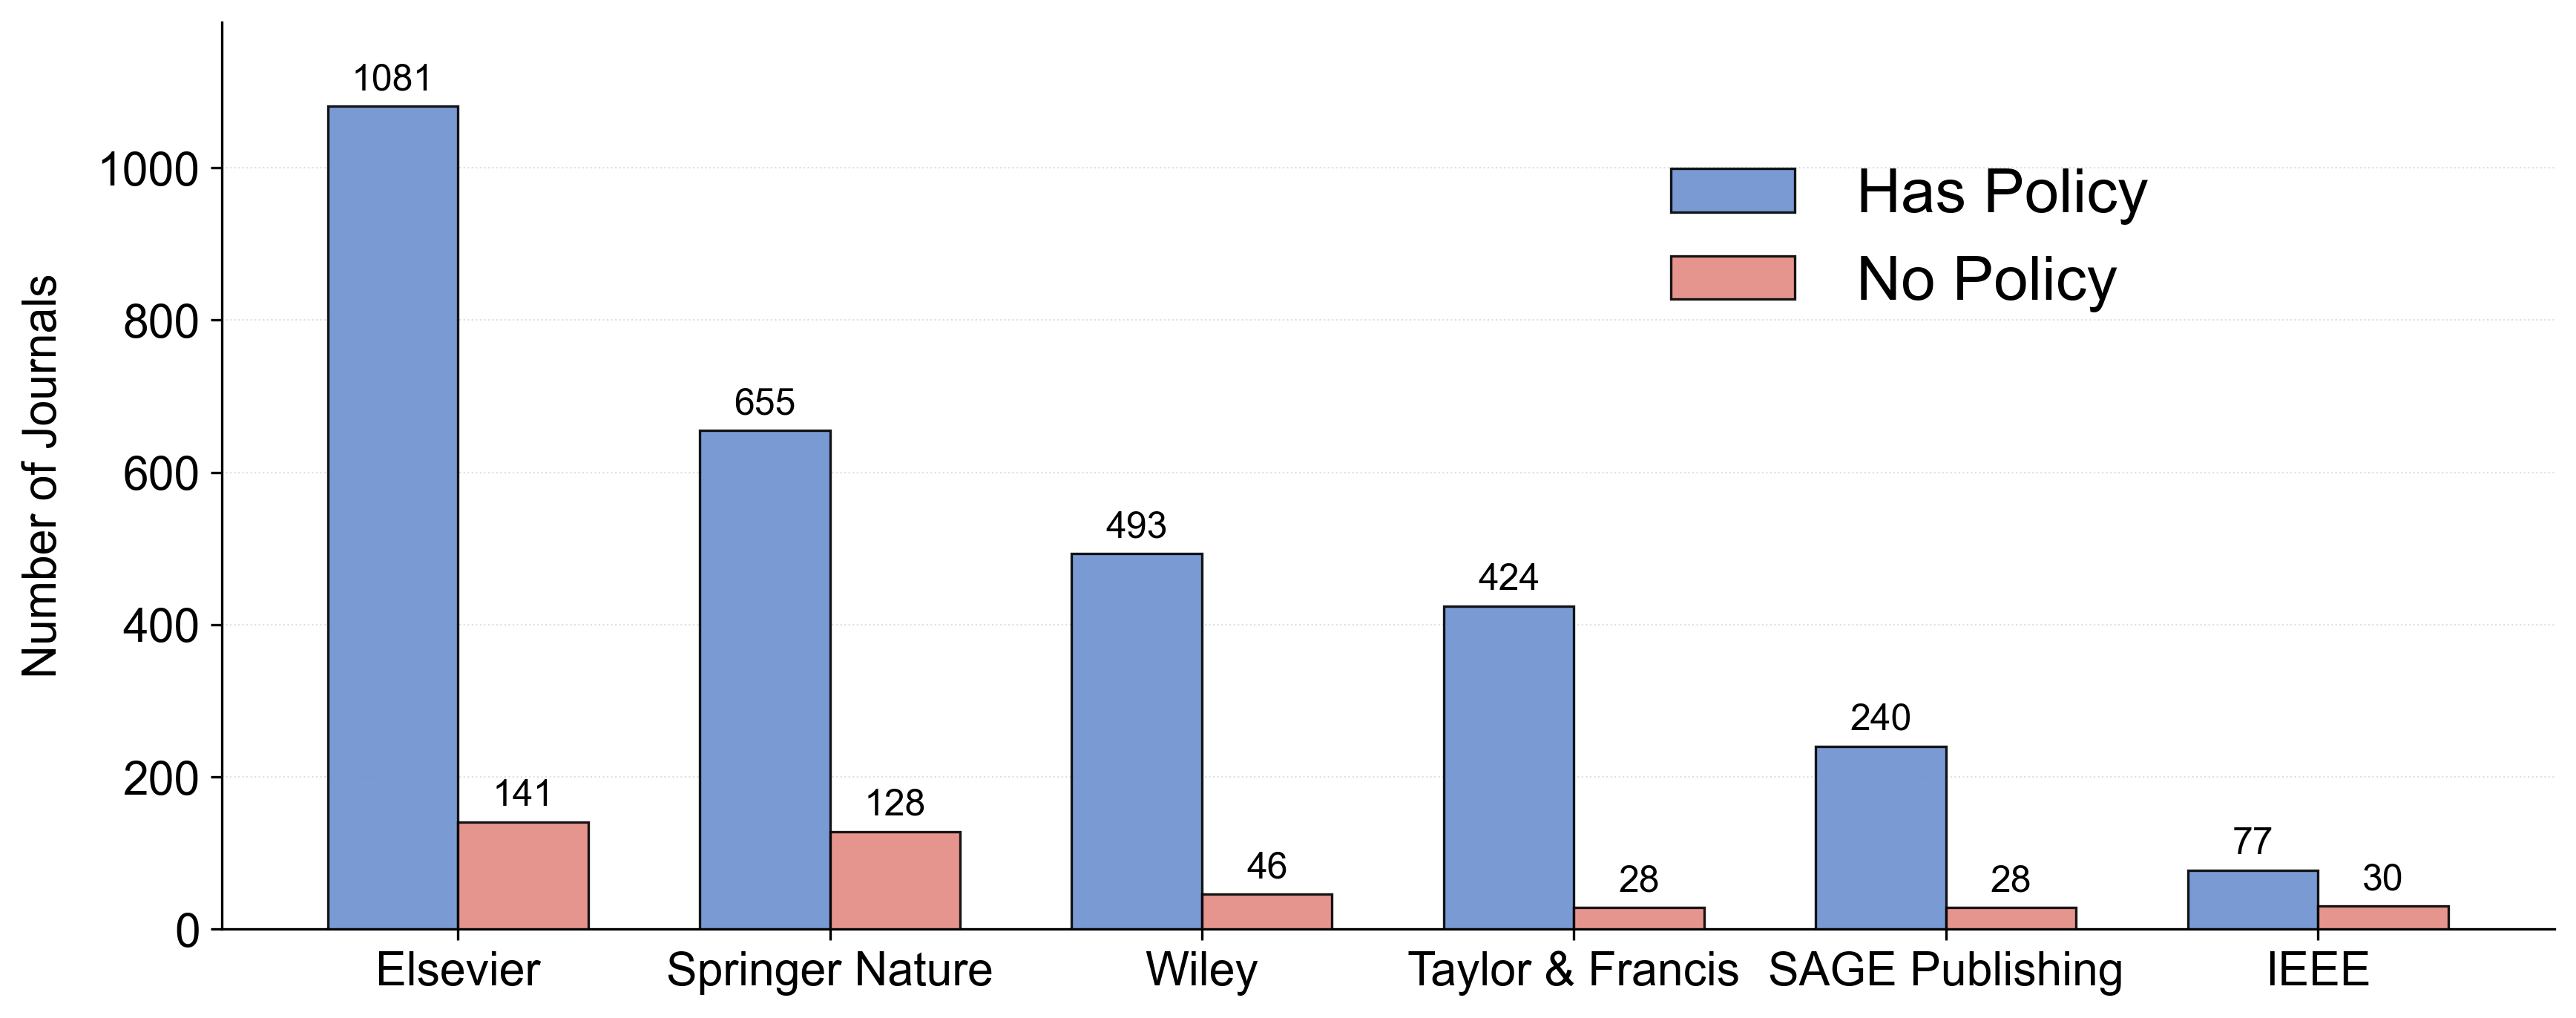

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def apply_unified_style():
    plt.style.use('default')
    plt.rcParams.update({
        'font.family': 'Arial',
        'font.size': 15,
        'axes.labelsize': 15,
        'axes.titlesize': 15,
        'xtick.labelsize': 15,
        'ytick.labelsize': 15,
        'legend.fontsize': 15,
        'figure.dpi': 300,
        'savefig.dpi': 600,
        'axes.linewidth': 0.8,
        'lines.linewidth': 2.0,
        'figure.figsize': (12, 5)  
    })

def set_unified_axes(ax, x_labels):
    ax.set_xticks(np.arange(len(x_labels)))
    ax.set_xticklabels(x_labels)  
    ax.set_ylabel('Number of Journals', labelpad=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.4, axis='y')
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(0, ymax * 1.05)
    plt.tight_layout(pad=1.5)

def save_transparent_figure(filename):
    plt.savefig(f'{filename}.png', dpi=600, transparent=True, bbox_inches='tight')
    plt.savefig(f'{filename}.tiff', dpi=600, format='tiff', transparent=True, bbox_inches='tight')


publisher_data = {
    'Publisher': ['Elsevier', 'Springer Nature', 'Wiley', 'Taylor & Francis', 
                  'SAGE Publishing','IEEE'],
    'Has Policy': [1080+0+1, 652+0+3, 493+0+0, 424+0+0, 240+0+0, 77+0+0],  # Disclosure Required + Open + Strict Prohibition
    'No Policy': [141, 128, 46, 28, 28, 30]  # Not Mentioned
}

df_publishers = pd.DataFrame(publisher_data)

print("Publisher policy statistics:")
print(df_publishers)

publishers = df_publishers['Publisher'].tolist()
has_policy = df_publishers['Has Policy'].tolist()
no_policy = df_publishers['No Policy'].tolist()


bar_colors = ['#6c8fd0', '#e48a82']  

apply_unified_style()
fig, ax = plt.subplots()

bar_width = 0.35
x = np.arange(len(publishers))

bars1 = ax.bar(x - bar_width/2, has_policy, bar_width, 
               color=bar_colors[0], label='Has Policy', edgecolor='black', linewidth=0.8, alpha=0.9, zorder=3)
bars2 = ax.bar(x + bar_width/2, no_policy, bar_width, 
               color=bar_colors[1], label='No Policy', edgecolor='black', linewidth=0.8, alpha=0.9, zorder=3)

for bar in bars1:
    height = bar.get_height()
    if height > 0:  
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

for bar in bars2:
    height = bar.get_height()
    if height > 0:  
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

set_unified_axes(ax, publishers)

ax.legend(frameon=False, 
          loc='upper right', 
          bbox_to_anchor=(0.85, 0.9),  
          ncol=1, 
          fontsize=20,  
          handletextpad=1,  
          columnspacing=1.2, 
          handlelength=2.0)  
save_transparent_figure('publisher_policy_distribution')
plt.show()
